In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

In [19]:
df = pd.read_csv("stockmarket.csv", parse_dates=["date"])

In [20]:
df.head()

,date,open,high,low,close,volume,dividend_amount
0,2005-01-03,388.7685,407.0464,388.7685,405.9997,11842921.0,0.0
1,2005-01-04,399.9444,407.3827,395.8329,396.8048,10059943.0,0.0
2,2005-01-05,392.8427,399.1970,385.9277,396.1319,16954266.0,0.0
3,2005-01-06,392.4690,401.0658,390.6747,393.1791,13446517.0,0.0
4,2005-01-07,394.7115,409.2889,394.3751,404.3176,16969845.0,0.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4083 entries, 0 to 4082
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             4083 non-null   datetime64[ns]
 1   open             4083 non-null   float64       
 2   high             4083 non-null   float64       
 3   low              4083 non-null   float64       
 4   close            4083 non-null   float64       
 5   volume           4083 non-null   float64       
 6   dividend_amount  4083 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 223.4 KB


In [22]:
df.set_index("date", inplace=True)

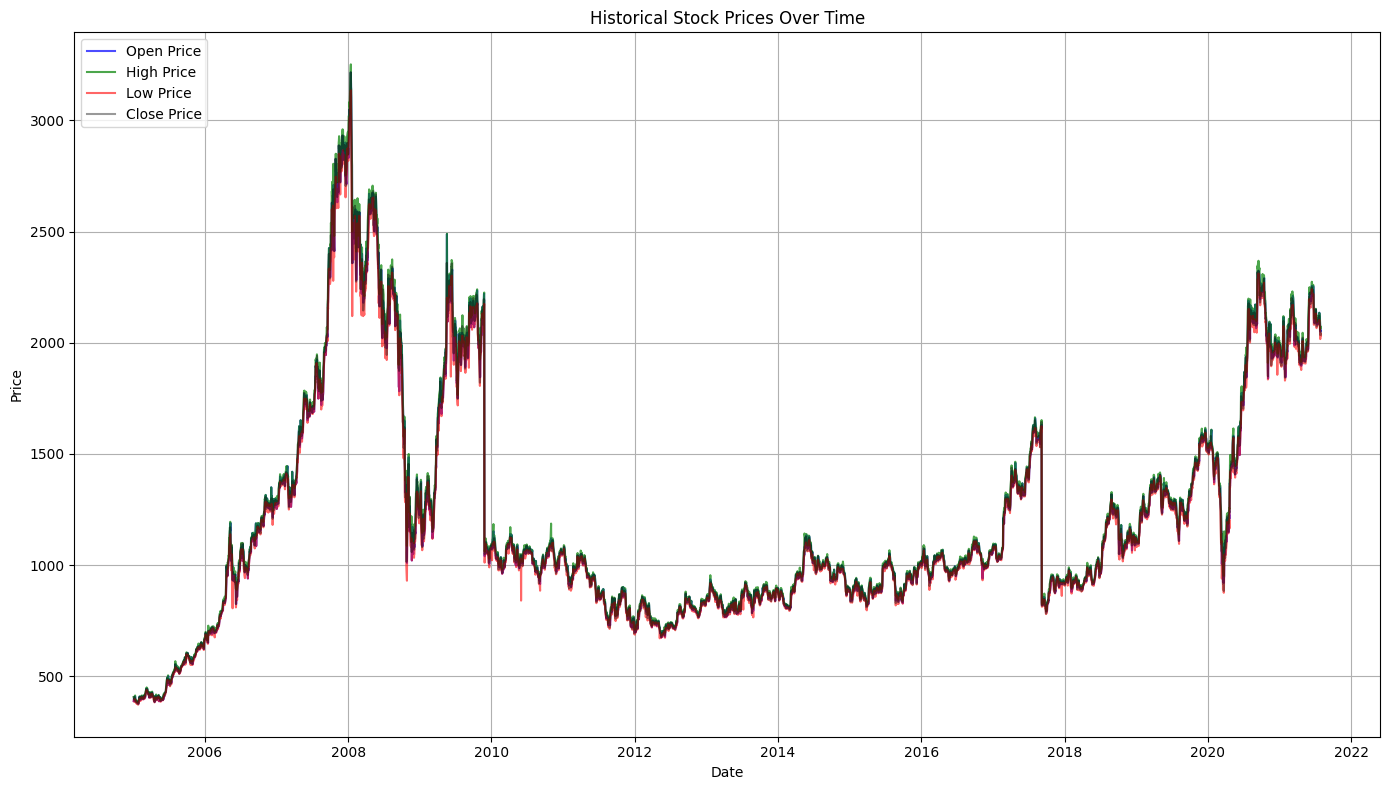

In [28]:
plt.figure(figsize=(14, 8))
plt.plot(df.index, df["open"], label="Open Price", color="blue", alpha=0.7)
plt.plot(df.index, df["high"], label="High Price", color="green", alpha=0.7)
plt.plot(df.index, df["low"], label="Low Price", color="red", alpha=0.6)
plt.plot(df.index, df["close"], label="Close Price", color="black", alpha=0.4)
plt.title("Historical Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.grid(True)

plt.tight_layout()
plt.show()

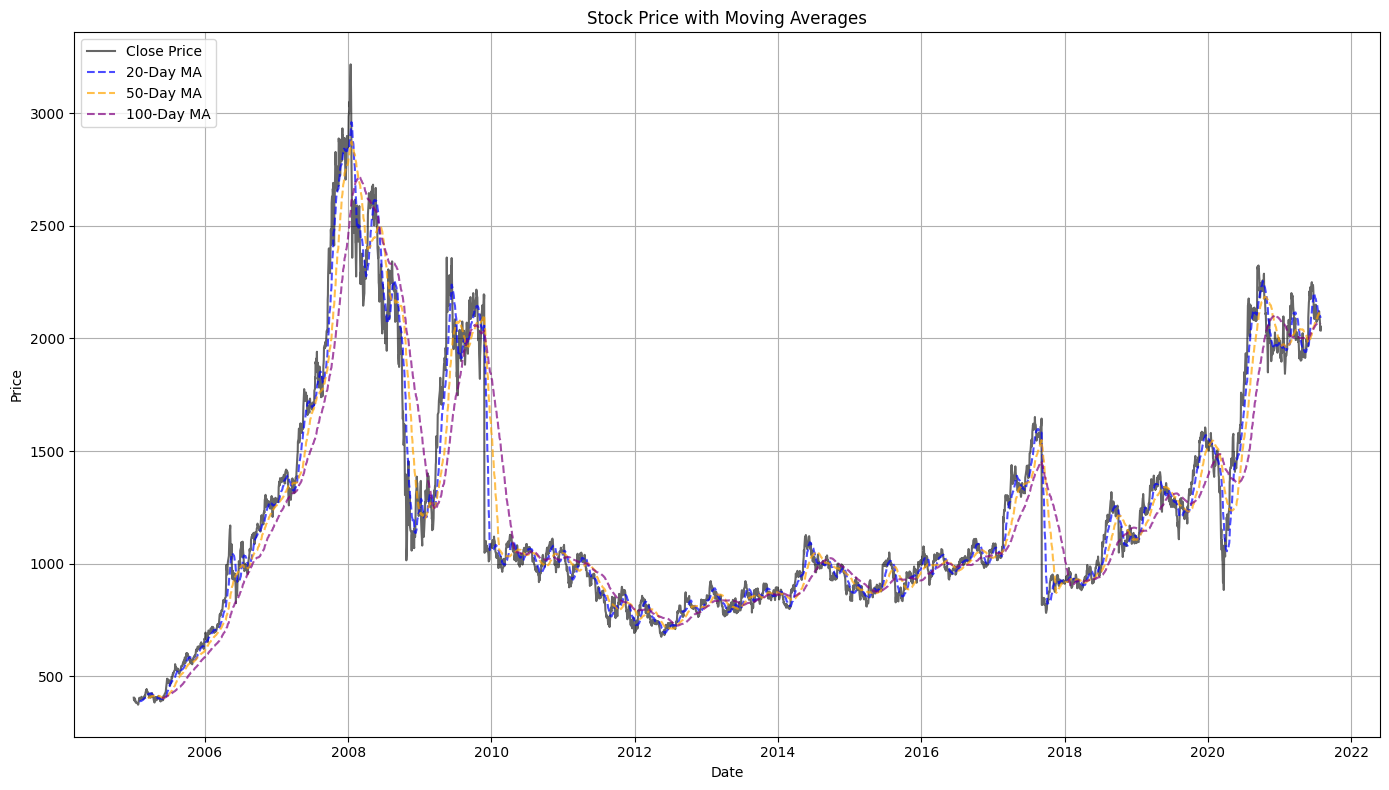

In [24]:
df["MA_20"] = df["close"].rolling(window=20).mean()  
df["MA_50"] = df["close"].rolling(window=50).mean()  
df["MA_100"] = df["close"].rolling(window=100).mean()  

plt.figure(figsize=(14, 8))
plt.plot(df.index, df["close"], label="Close Price", color="black", alpha=0.6)
plt.plot(df.index, df["MA_20"], label="20-Day MA", color="blue", linestyle="--", alpha=0.7)
plt.plot(df.index, df["MA_50"], label="50-Day MA", color="orange", linestyle="--", alpha=0.7)
plt.plot(df.index, df["MA_100"], label="100-Day MA", color="purple", linestyle="--", alpha=0.7)

plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.grid(True)

plt.tight_layout()
plt.show()


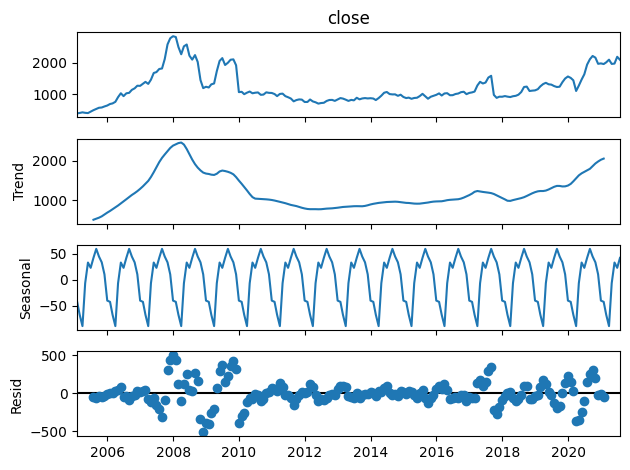

In [25]:
monthly_data = df["close"].resample("M").mean()
decomposition = sm.tsa.seasonal_decompose(monthly_data, model="additive")

decomposition.plot()
plt.tight_layout()
plt.show()

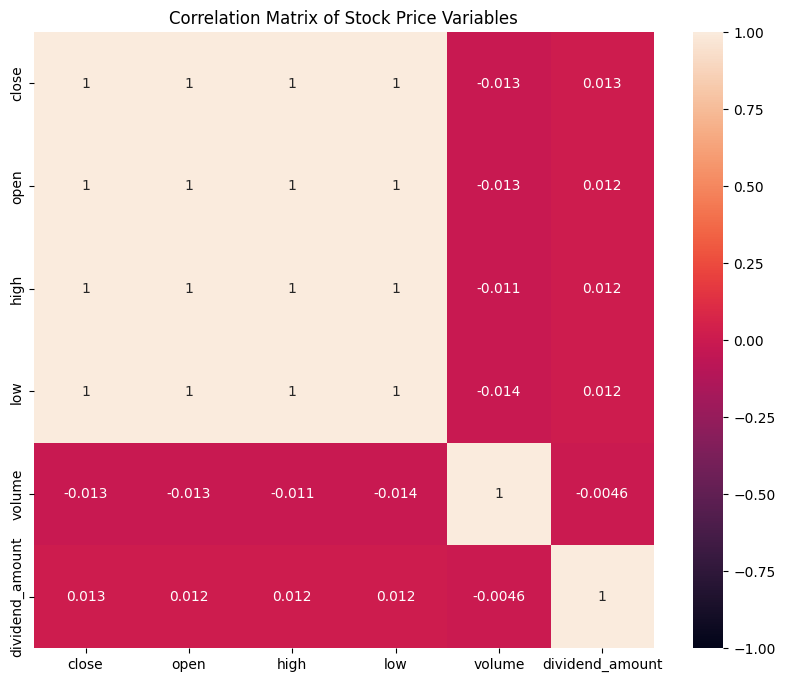

In [26]:
correlation_matrix = df[['close', 'open', 'high', 'low', 'volume', 'dividend_amount']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1)
plt.title("Correlation Matrix of Stock Price Variables")
plt.show()